In [1]:
%matplotlib inline

In [2]:
from cosmodc2.sdss_colors import load_umachine_processed_sdss_catalog
sdss = load_umachine_processed_sdss_catalog()
print(sdss.keys())

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['ra', 'dec', 'z', 'sm', 'ssfr', 'nd', 'restframe_extincted_sdss_abs_magr', 'restframe_extincted_sdss_gr', 'restframe_extincted_sdss_ri', 'size_kpc', 'dr7_PhotoObj_Table_ID', 'sfr_percentile_fixed_sm', 'gr_percentile_fixed_magr']


In [3]:
import os
from astropy.table import Table

#  MDPL2-based mock
dirname = "/Users/aphearin/work/random/0331"
basename = "cutmock_1e9.hdf5"
fname = os.path.join(dirname, basename)
mock = Table.read(fname, path='data')
mock.Lbox = 500.

#  Bpl-based mock
# dirname = "/Users/aphearin/work/random/0331"
# basename = "testing_bpl_based_v4.hdf5"
# fname = os.path.join(dirname, basename)
# mock = Table.read(fname, path='data')
# mock.Lbox = 250.

print(mock.keys())

['halo_id', 'upid', 'vpeak', 'mpeak', 'mvir', 'vmax', 'sm', 'sfr', 'obs_sm', 'obs_sfr', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'hostid', 'host_halo_x', 'host_halo_y', 'host_halo_z', 'host_halo_vx', 'host_halo_vy', 'host_halo_vz', 'host_halo_mvir', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_sfr_percentile', 'sfr_percentile']


In [4]:
from cosmodc2.sdss_colors import mock_magr

mock['restframe_extincted_sdss_abs_magr'] = mock_magr(
            mock['upid'], mock['obs_sm'], mock['sfr_percentile'], 
            mock['host_halo_mvir'], sdss['sm'], sdss['sfr_percentile_fixed_sm'], 
            sdss['restframe_extincted_sdss_abs_magr'], sdss['z'])


In [5]:
from cosmodc2.sdss_colors import mock_magr_from_sdss_draws


mstar_mock = mock['obs_sm']
sfr_percentile_mock = mock['sfr_percentile']
magr_sdss = sdss['restframe_extincted_sdss_abs_magr']
redshift_sdss = sdss['z']
logsm_sdss = sdss['sm'] 
sfr_percentile_sdss = sdss['sfr_percentile_fixed_sm']

mock['v3_magr'] = mock_magr_from_sdss_draws(mstar_mock, sfr_percentile_mock,
          logsm_sdss, sfr_percentile_sdss, magr_sdss, redshift_sdss)

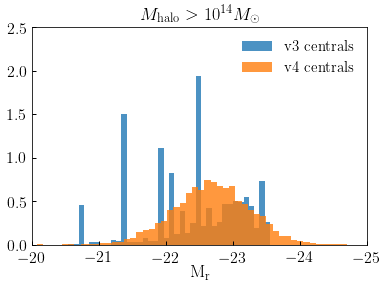

In [37]:
cenmask = mock['upid'] == -1
cluster_halo_mask = mock['host_halo_mvir'] > 10**14

fig, ax = plt.subplots(1, 1)

morange = u'#ff7f0e'
mblue = u'#1f77b4'

nbins = 50
__=ax.hist(mock['v3_magr'][cluster_halo_mask & cenmask], color=mblue, 
          bins=nbins, normed=True, alpha=0.8, label=r'${\rm v3\ centrals}$')

__=ax.hist(mock['restframe_extincted_sdss_abs_magr'][cluster_halo_mask & cenmask], 
           color=morange, bins=nbins, normed=True, alpha=0.8,
           label=r'${\rm v4\ centrals}$')


xlim = ax.set_xlim(-20, -25)
ylim = ax.set_ylim(0, 2.5)
legend = ax.legend()
xlabel = ax.set_xlabel(r'${\rm M_{\rm r}}$')
title = ax.set_title(r'$M_{\rm halo} > 10^{14}M_{\odot}$')

figname = 'cluster_bcg_lf_v3_vs_v4.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel], bbox_inches='tight')